### Hierarchical Clustering with 2D toy datasets
https://scikit-learn.org/stable/modules/clustering.html#clustering

In [1]:
# 載入套件
%matplotlib inline
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

In [2]:
# 設定 2D 樣板資料
n_samples = 1500
random_state = 100

noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05, random_state=random_state)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

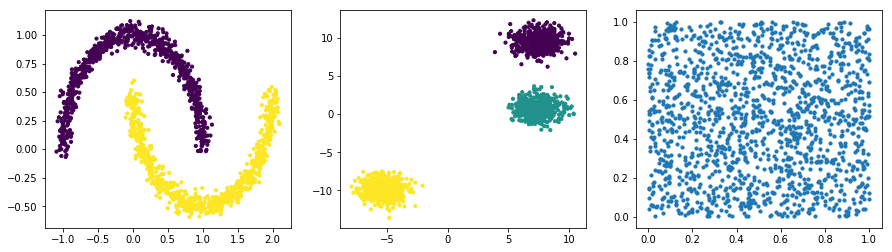

In [3]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for ax, dataset in zip(axes.ravel(), [noisy_moons, blobs, no_structure]):
    X = dataset[0]
    y = dataset[1]
    ax.scatter(X[:, 0], X[:, 1], c=y, s=10)

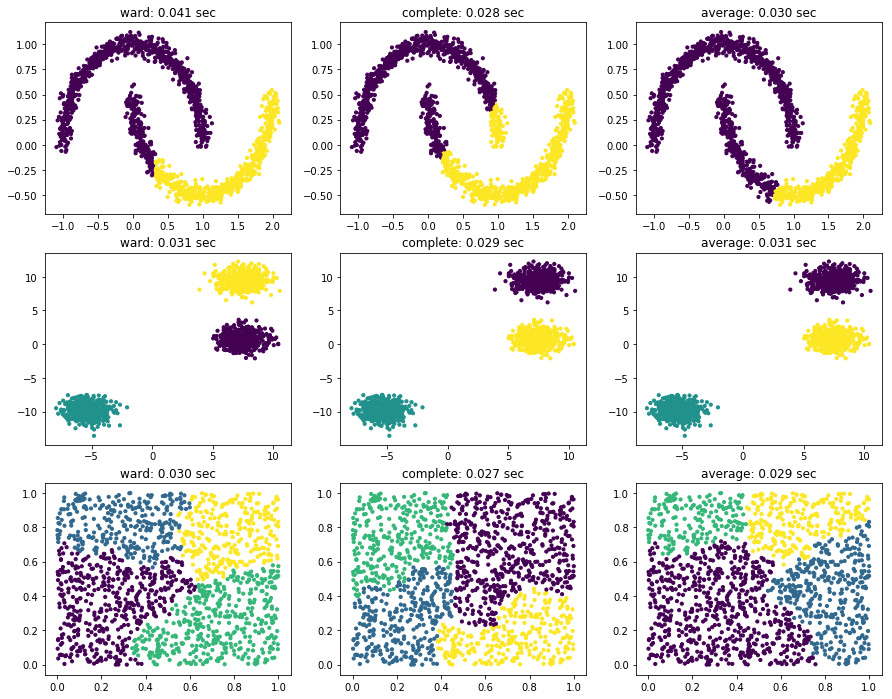

In [4]:
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
    
n_clusters = [2, 3, 4]
for i, dataset in enumerate([noisy_moons, blobs, no_structure]):
    X = dataset[0]
    y = dataset[1]
    
    estimators = (
        ('ward', cluster.AgglomerativeClustering(n_clusters=n_clusters[i], linkage="ward")),
        ('complete', cluster.AgglomerativeClustering(n_clusters=n_clusters[i], linkage="complete")),
        ('average', cluster.AgglomerativeClustering(n_clusters=n_clusters[i], linkage="average"))
    )
    for j, (name, est) in enumerate(estimators):
        t0 = time.time()
        est.fit(X)
        t1 = time.time()
        labels = est.labels_
        
        axes[i][j].scatter(X[:, 0], X[:, 1], c=labels, s=10)
        axes[i][j].set_title(f"{name}: {t1-t0:.3f} sec")
